### Projecto de Machine Learning - Etapa 2
Autor: German Andres Torres

#### 1) Exploración y perfilamiento de los datos

Como primer paso, importaremos todas las librerías necesarias.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV,train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

Cargamos el archivos

In [5]:
data_raw = pd.read_excel('./data/proyecto-mk-etapa-2-datos.xlsx', na_values=['?'])
data_raw.shape

(3276, 10)

Se cuentan con 3276 registros y 10 columnas. A continuación, se realiza una breve revisión de los datos generales y se observan algunos registros.

In [7]:
data_raw.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,NO
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,NO
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,NO
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,NO
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,NO


In [9]:
data_raw.describe()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080804,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731
std,1.594369,32.879680,8768.570852,1.583143,41.416864,80.824123,3.308232,16.174983,0.780354
min,0.000000,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000
25%,6.090000,176.847500,15666.687500,6.130000,307.695000,365.735000,12.070000,55.847500,3.440000
50%,7.040000,196.965000,20927.830000,7.130000,333.070000,421.885000,14.220000,66.620000,3.955000
75%,8.060000,216.670000,27332.760000,8.112500,359.950000,481.790000,16.560000,77.337500,4.500000
max,14.000000,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000


Ahora, revisemos el diccionario de datos para tener una idea de los rangos

In [14]:
dictionary = pd.read_excel('./data/diccionario.xlsx')
dictionary

,Column Name,Type,Description
0,pH,numérico,El PH es un parámetro importante para evaluar ...
1,Dureza,numérico,La dureza está causada principalmente por las ...
2,Sólidos,numérico,(Sólidos totales disueltos - TDS). El agua tie...
3,Cloraminas,numérico,El cloro y la cloramina son los principales de...
4,Sulfatos,numérico,Los sulfatos son sustancias naturales que se e...
5,Conductividad,numérico,El agua pura no es un buen conductor de la cor...
6,Carbono_orgánico,numérico,El carbono orgánico total (COT) en las aguas p...
7,Trihalometanos,numérico,Los Trihalometanos (THM) son sustancias químic...
8,Turbidez,numérico,La turbidez del agua depende de la cantidad de...
9,Apta,numérico,"Indica si el agua es segura para el consumo, d..."


**NOTA:** En las sesiones sincrónicas se definió que el diccionario tiene varios errores, por lo que no se tomarán en cuenta límites y valores aplicables.

En los siguientes gráficos, podemos observar la distribución de los datos para tener una guia visual acerca del dataset.

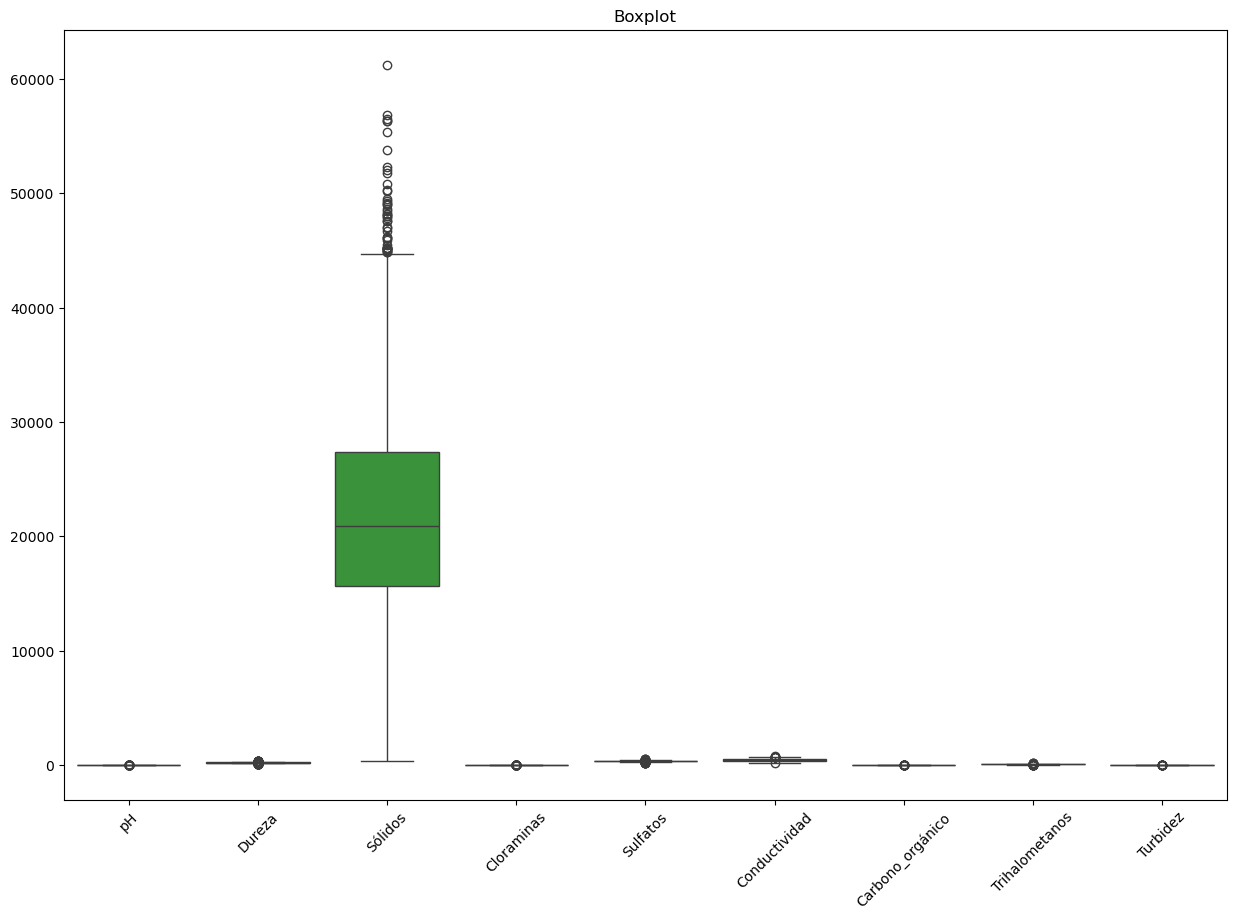

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_raw)
plt.title('Boxplot')
plt.xticks(rotation=45)
plt.show()

La variable **Solidos** tiene una distribución con valores relativamente altos en comparación con las otras variables. La mediana está en torno a los 20,000 y se observan varios outliers (valores atípicos) alrededor de 50,000.

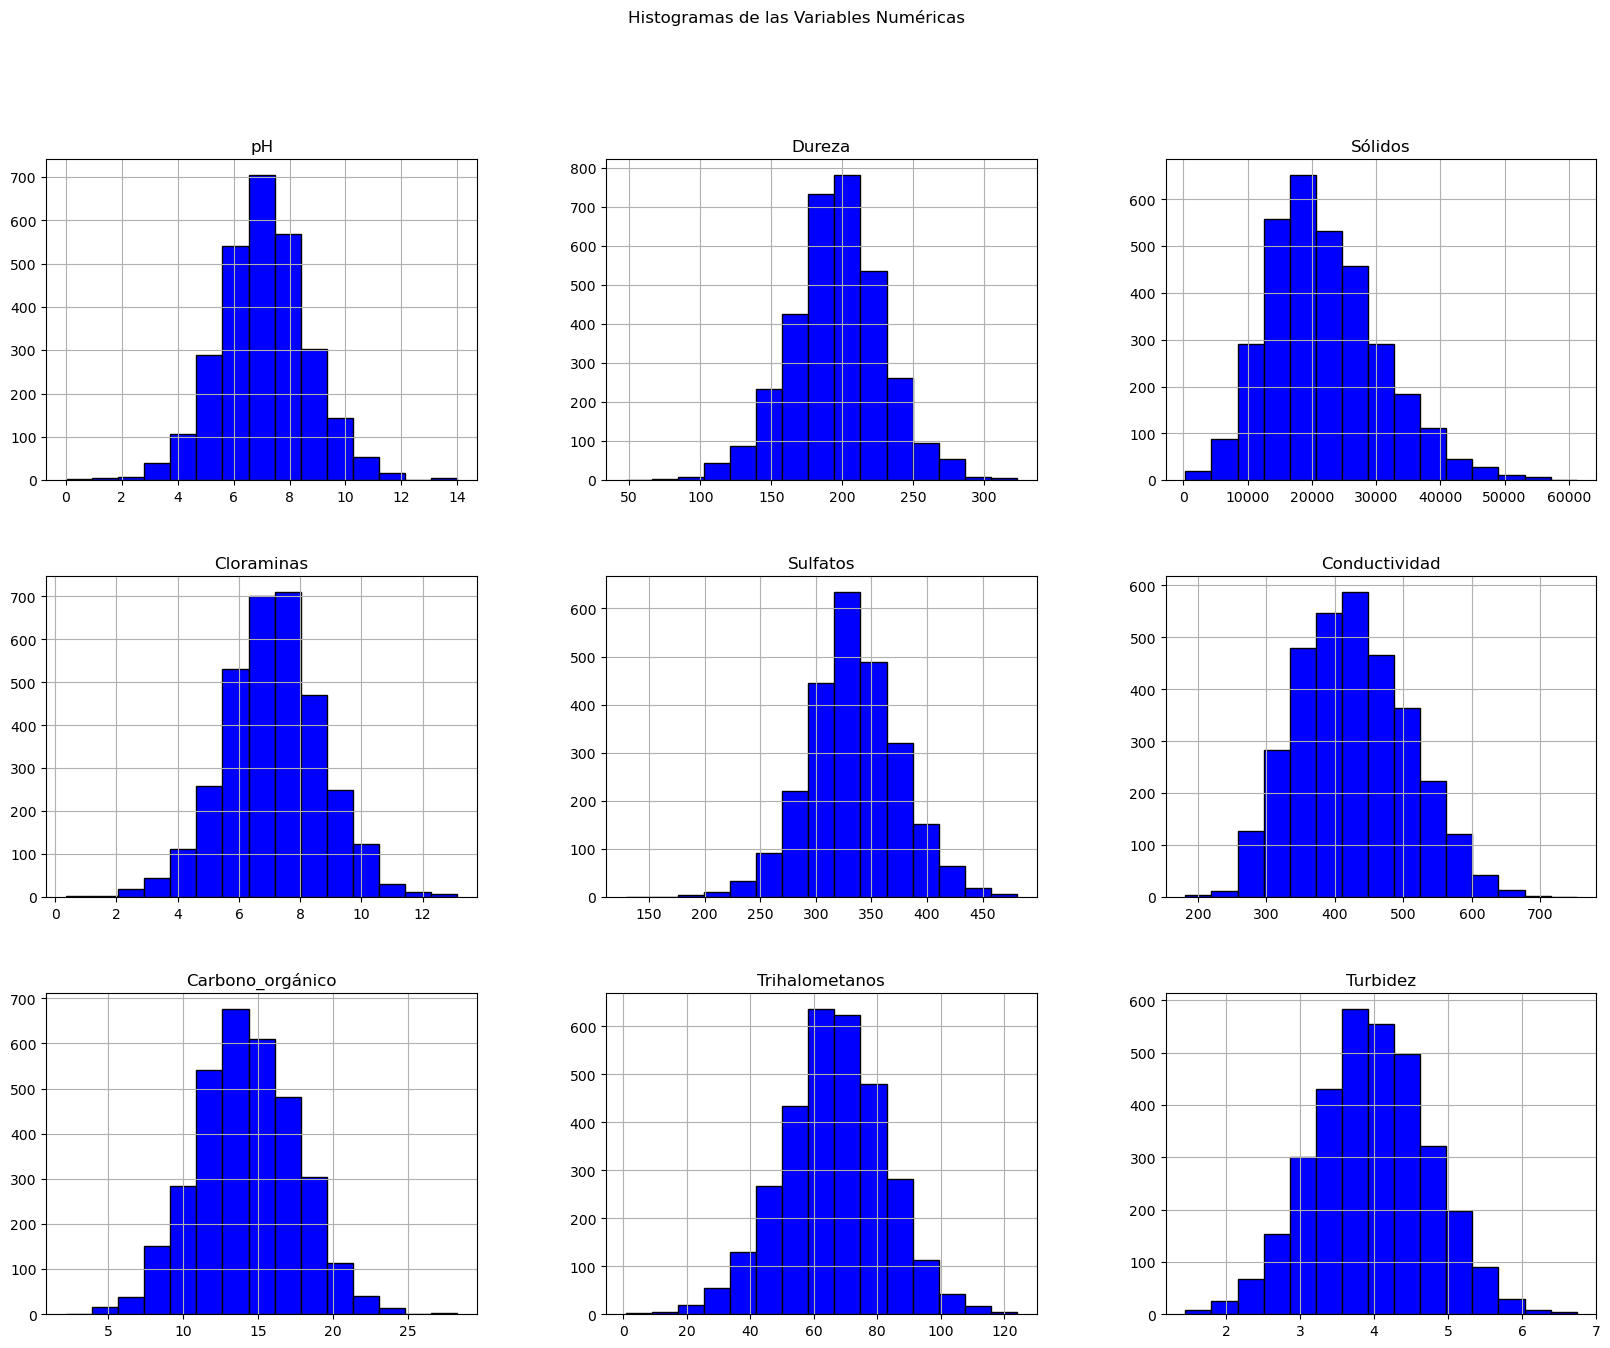

In [21]:
data_raw.hist(bins=15, figsize=(20,15), color='blue', edgecolor='black')
plt.suptitle('Histogramas de las Variables Numéricas')
plt.show()

Nuevamente se hace evidente que la variable `Solidos` presenta una escala diferente al resto de las variables.

Ahora hacemos una revisón del tipo de varibales (categóricas o númericas)

In [25]:
numeric_features = [
    i for i, col in enumerate(data_raw.columns) 
    if (data_raw.dtypes[col]==np.dtype('int64'))
    or (data_raw.dtypes[col]==np.dtype('float64'))
]

categorical_features = [
    i for i, col in enumerate(data_raw.columns) 
    if (data_raw.dtypes[col]==np.dtype('object'))
]

print(f"Variables numéricas:\n{list(zip(numeric_features, data_raw.columns.take(numeric_features)))}")
print(f"\nVariables categóricas:\n{list(zip(categorical_features, data_raw.columns.take(categorical_features)))}")

Variables numéricas:
[(0, 'pH'), (1, 'Dureza'), (2, 'Sólidos'), (3, 'Cloraminas'), (4, 'Sulfatos'), (5, 'Conductividad'), (6, 'Carbono_orgánico'), (7, 'Trihalometanos'), (8, 'Turbidez')]

Variables categóricas:
[(9, 'Potabilidad')]


Tenemos 9 variables númericas y 1 categórica; dado que Potabilidad es nuestra variable objetivo no realizaremos operaciones de conversion de variables pero si se aplicará un proceso de estandarización en las númericas. 

#### 2) Limpieza y preparación de los datos
En esta sección haremos la busqueda de valores asuentes y duplicados. Primero creamos una copia para no modificar el dataset original.

In [29]:
data = data_raw.copy()

Realizamos la busqueda de duplicados

In [32]:
data.duplicated().sum()

0

En este caso no existen registros duplicados. Seguimos con la busqueda de valores asuentes

In [35]:
data.isna().sum()

pH                  491
Dureza                0
Sólidos               0
Cloraminas            0
Sulfatos            781
Conductividad         0
Carbono_orgánico      0
Trihalometanos      162
Turbidez              0
Potabilidad           0
dtype: int64

Como se puede observar, tenemos 781 con al menos 1 valor ausente. Esto representa un 23.84% de los datos, por lo que no es buena idea eliminarlos. En este ejercicio, reemplazaremos estos valores por la media.

#### 3) Construcción de un modelo de árboles de decisión

Ahora dividiremos el conjunto de datos resultante en un conjunto de entrenamiento y uno de pruebas mediante la función `train_test_split()`. Usaremos el 80% de los datos para el entrenamiento y el 20% restante para las pruebas:

In [39]:
train, test = train_test_split(data, test_size=0.2, random_state=77)
train.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
3126,6.67,155.71,30610.05,8.17,337.17,425.69,15.10,79.78,4.90,SI
3147,6.26,130.37,9734.68,10.28,320.36,399.35,10.85,43.42,3.93,SI
2844,6.66,182.39,16828.88,7.07,355.90,434.66,16.62,69.41,3.97,SI
1916,8.02,255.26,30854.83,8.76,NaN,442.50,11.09,93.27,5.32,SI
1053,8.92,207.52,13291.92,8.56,357.94,468.54,15.69,107.28,4.08,NO


Aislamos nuestra variable objetivo `Potabilidad`

In [42]:
x_train = train.drop(['Potabilidad'],axis=1)
y_train = train['Potabilidad']

Construimos un pipeline que incluirá:
- El SimpleImputer para reemplazar valores ausentes por la media
- El modelo DecisionTreeClassifier.

Para los arboles de decisión no usaremos ningun scaler

In [45]:
tree_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('classifier', DecisionTreeClassifier(class_weight='balanced'))
])

Definimos la tupla `tree_param_grid` con los diferentes valores para nuestro modelo.

**NOTA**: El valor original para `classifier__max_depth` era [4, 6, 8, 10, 12], sin embargo el punto 6 del taller pide evaluar el `max_depth` con 3. Por esta razon lo agregamos dentro de los valores,  evitando correr el modelo 2 veces y trabajar con las mismas condiciones para todos los casos.

In [48]:
tree_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [4, 6, 8, 10, 12],
    'classifier__min_samples_split': [3, 4, 5]
}

Definimos un `Kfold` para realizar la validación cruzada con 10 subconjuntos de datos

In [51]:
kfold = KFold(n_splits=10, shuffle=True, random_state=77)

Creamos el objeto `tree_grid` de tipo GridSearchCV y entrenamos el modelo.

In [54]:
tree_grid = GridSearchCV(estimator=tree_pipeline, param_grid=tree_param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
tree_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('classifier',
                                        DecisionTreeClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 4, 6, 8, 10, 12],
                         'classifier__min_samples_split': [3, 4, 5]},
             scoring='accuracy')

Ahora obtendremos los mejores valores de los hiperparámetros

In [57]:
print("Mejores parámetros encontrados:", tree_grid.best_params_)
print("Mejor score en entrenamiento:", tree_grid.best_score_)

Mejores parámetros encontrados: {'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__min_samples_split': 4}
Mejor score en entrenamiento: 0.6236641221374046


Almacenaremos el mejor modelo y obtenemos los datos sobre la importacia.

In [60]:
tree_best_model = tree_grid.best_estimator_
importance = tree_best_model.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame(data={'Variable': x_train.columns, 'Importancia': importance})
importance_df = importance_df.sort_values('Importancia', ascending=False)
print(importance_df)

           Variable  Importancia
0                pH     0.516443
4          Sulfatos     0.194801
1            Dureza     0.082310
3        Cloraminas     0.054696
8          Turbidez     0.047497
7    Trihalometanos     0.038191
2           Sólidos     0.037692
5     Conductividad     0.028371
6  Carbono_orgánico     0.000000


Podemos decir que la variable `Carbono_orgánico` no tiene impacto en nuestro modelo, mientras que el `PH` y `Sulfatos` son factores decisivos. 

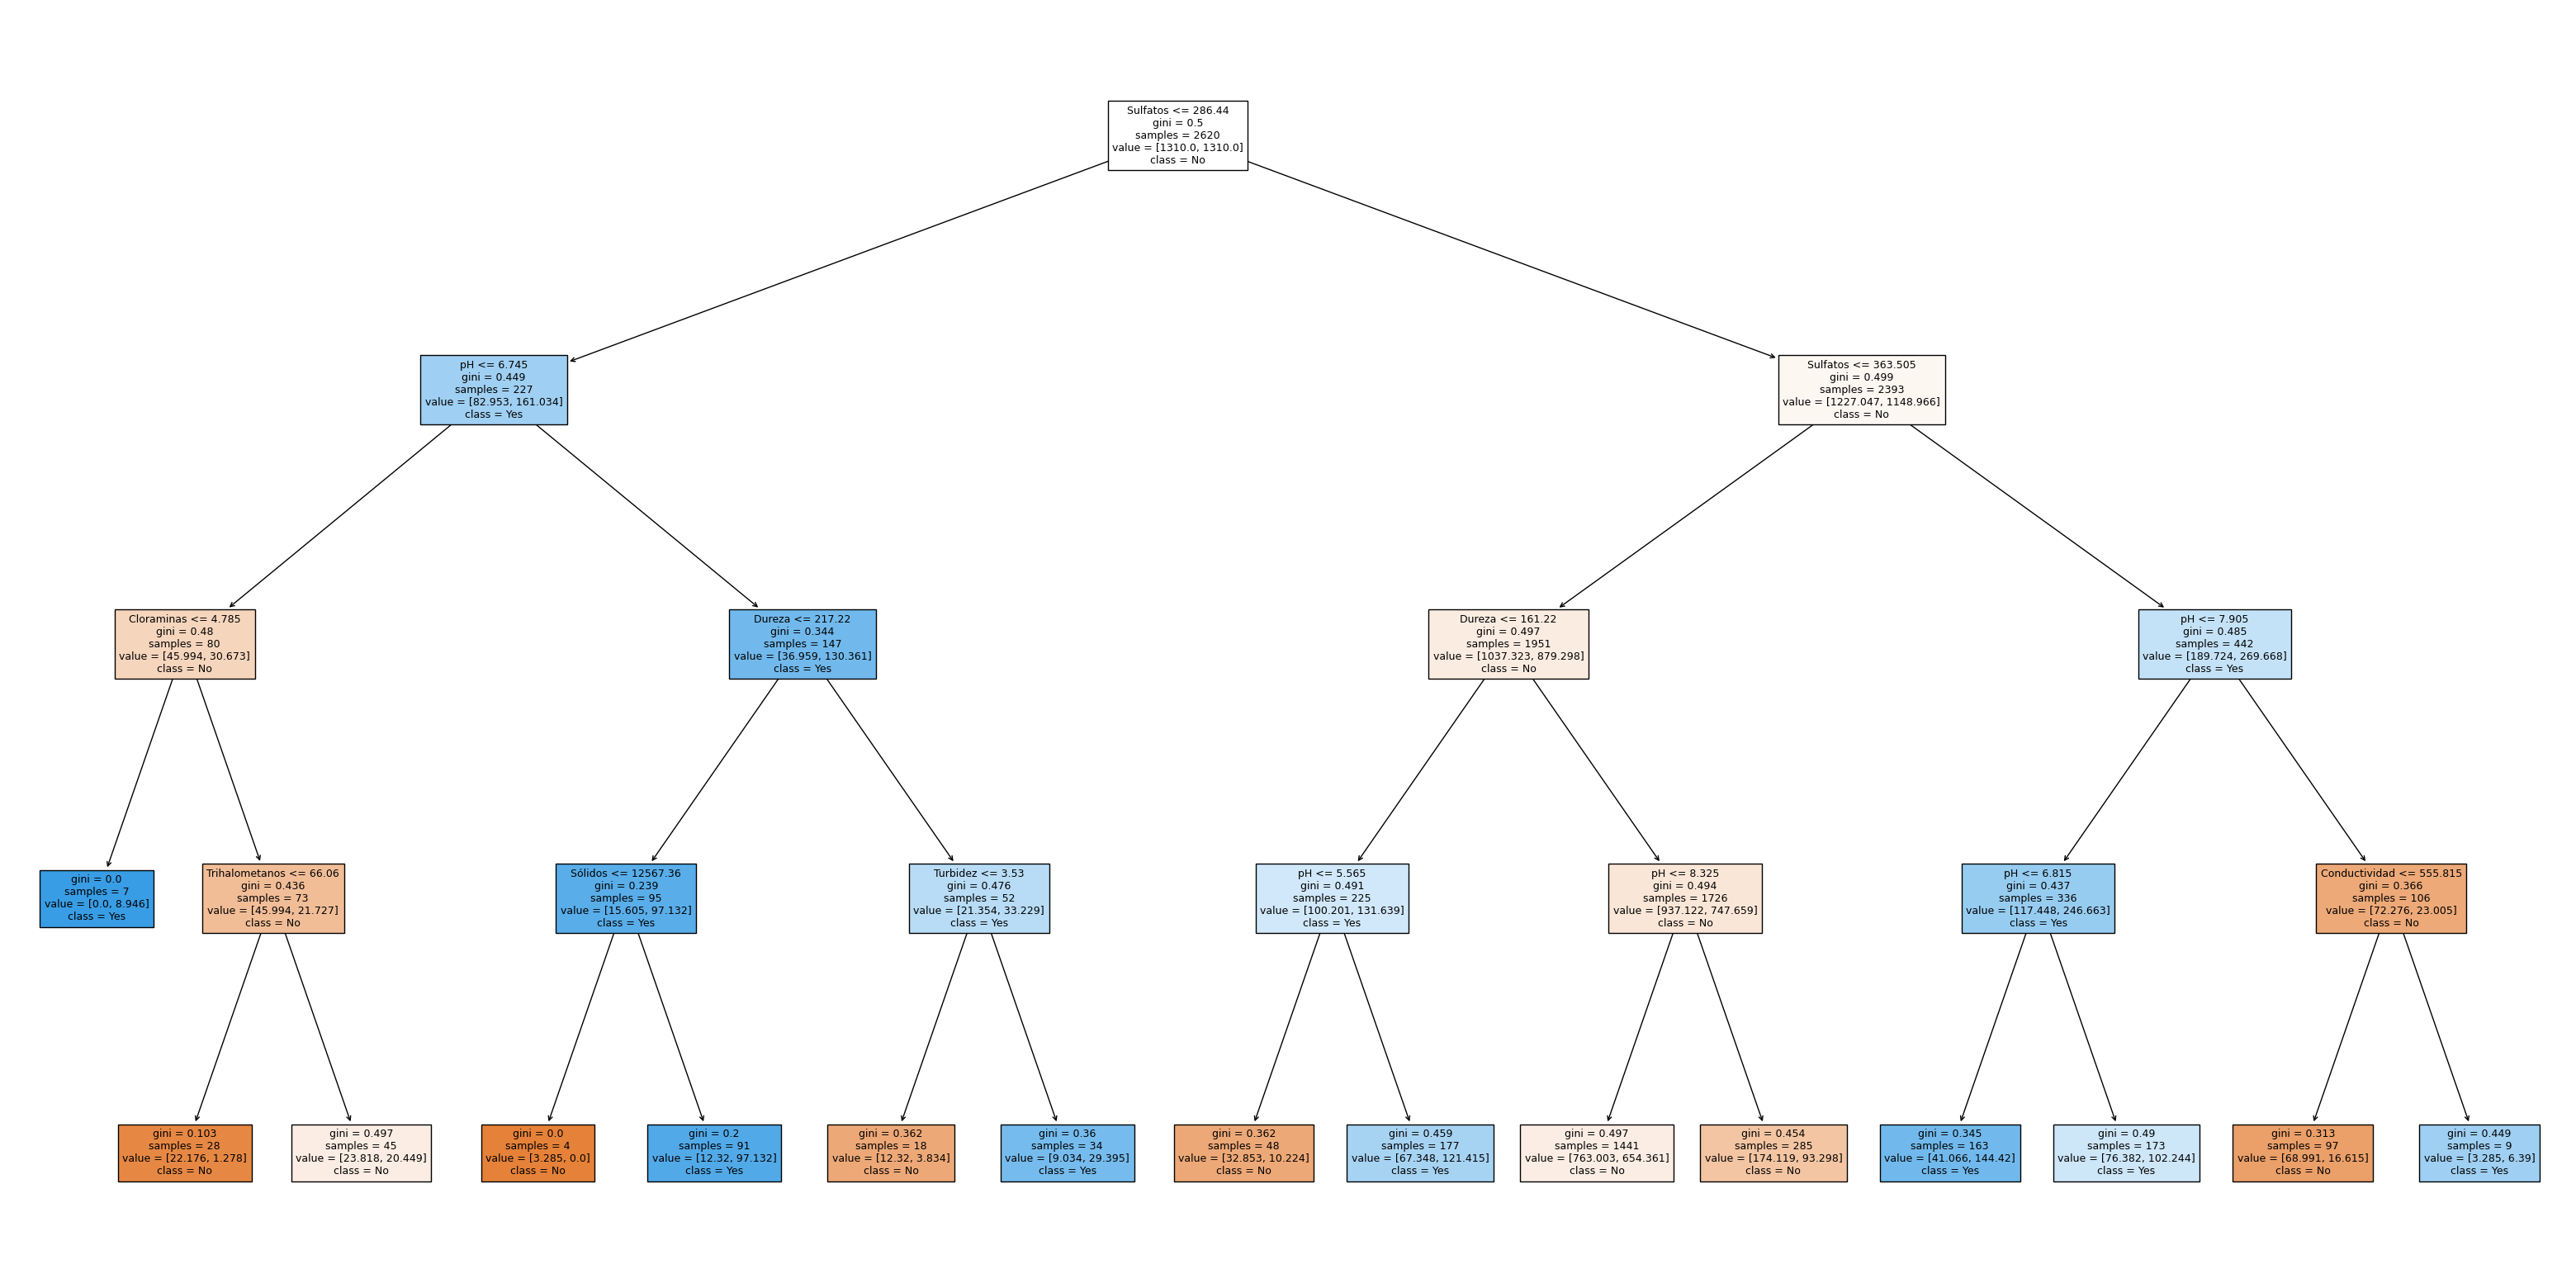

In [63]:
arbol_decision = tree_best_model.named_steps['classifier']
plt.figure(figsize=(40,20))
tree = plot_tree(arbol_decision, feature_names=x_train.columns, class_names=['No', 'Yes'], filled=True, fontsize=9)
plt.show()

Para finalizar esta sección evaluaremos nuestro modelo. Primero separamos las variables independientes y la variable objetivo en el conjunto de pruebas.

In [66]:
x_test = test.drop(['Potabilidad'],axis=1)
y_test = test['Potabilidad']

Realizamos predicciones con el fin de compararlas con los valores reales

In [69]:
tree_y_pred = tree_best_model.predict(x_test)

Obtenemos algunos datos de rendimiento para hacer una tabla comparativa más adelante

In [72]:
tree_accuracy = accuracy_score(y_test, tree_y_pred)
tree_recall = recall_score(y_test, tree_y_pred, average='weighted')
tree_precision = precision_score(y_test, tree_y_pred, average='weighted')
tree_f1_score = f1_score(y_test, tree_y_pred, average='weighted')
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

          NO       0.66      0.80      0.72       403
          SI       0.51      0.34      0.40       253

    accuracy                           0.62       656
   macro avg       0.58      0.57      0.56       656
weighted avg       0.60      0.62      0.60       656



#### 4) Construcción de un modelo utilizando el algoritmo K-vecinos más cercanos

Volvemos a dividir el conjunto de datos resultante en un conjunto de entrenamiento y uno de pruebas mediante la función `train_test_split()`. Usaremos el 80% de los datos para el entrenamiento y el 20% restante para las pruebas:

In [75]:
test, train = train_test_split(data, test_size=0.2, random_state=77)
x_train = train.drop(['Potabilidad'],axis=1)
y_train = train['Potabilidad']

Construimos un pipeline que incluirá:
- El SimpleImputer para reemplazar valores ausentes por la media
- El MinMaxScaler para estandarizar los datos debido a que nuestra variable `Solidos` presenta una escala diferente
- El modelo KNeighborsClassifier.

In [78]:
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

Definimos la tupla `knn_param_grid` con los diferentes valores para nuestro modelo.

In [81]:
knn_param_grid = {
    'knn__n_neighbors': [1, 2, 3, 4, 5]  
}

Creamos el objeto `knn_grid` de tipo GridSearchCV y entrenamos el modelo.

In [ ]:
knn_grid = GridSearchCV(estimator=knn_pipeline, param_grid=knn_param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
knn_grid.fit(x_train, y_train)

In [ ]:
print(f"Mejor valor de K: {knn_grid.best_params_}")
print(f"Mejor precisión en validación cruzada: {knn_grid.best_score_:.4f}")

Realizamos predicciones con el fin de compararlas con los valores reales

In [ ]:
x_test = test.drop(['Potabilidad'],axis=1)
y_test = test['Potabilidad']
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(x_test)

Obtenemos algunos datos para hacer una tabla comparativa mas adelante

In [ ]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
knn_f1_score = f1_score(y_test, knn_y_pred, average='weighted')
print(classification_report(y_test, knn_y_pred))

#### 5) Tabla comparativa del rendimiento sobre test de los dos modelos

Con los 2 modelos creados y sus variables guardadas, procedemos a crear una tabla comparativa

In [ ]:
tree_metrics = {
    'Exactitud (Accuracy)': tree_accuracy,
    'Sensibilidad (Recall)': tree_recall,
    'Precisión (Precision)': tree_precision,
    'F1-Score': tree_f1_score
}

knn_metrics = {
    'Exactitud (Accuracy)': knn_accuracy,
    'Sensibilidad (Recall)': knn_recall,
    'Precisión (Precision)': knn_precision,
    'F1-Score': knn_f1_score
}

comparative_df = pd.DataFrame({
    'Árbol de Decisión': tree_metrics,
    'K-Vecinos Más Cercanos (KNN)': knn_metrics
})

print(comparative_df)

#### 6) Generación de reglas usando arboles de decisión con una profundidad de tres (3)

Con el modelo ya generado en el paso 3, vamos a buscar y obtener todos los resultados para la profundidad 3

In [ ]:
results = tree_grid.cv_results_

index_max_depth_3 = [
    i for i, params in enumerate(results['params']) 
    if params['classifier__max_depth'] == 3
]

Con la lista, buscamos el mejor modelo usando la metrica `mean_test_score` para finalmente imprimir las reglas del arbol.

In [ ]:
best_index_max_depth_3 = max(index_max_depth_3, key=lambda i: results['mean_test_score'][i])
best_model_max_depth_3 = tree_grid.cv_results_['params'][best_index_max_depth_3]

mejor_modelo = tree_grid.best_estimator_
tree_rules = export_text(mejor_modelo.named_steps['classifier'], feature_names=list(x_train.columns))
print(tree_rules)

#### 7) Analisis de resultados

- ¿Qué puedes decir de los valores de las métricas recall y precisión para cada una de las clases en cada modelo? ¿Cuál de estás métricas consideras que es más importante con base en la descripción del problema?

    El Árbol de Decisión tiene un mejor `recall` y  `precision` que KNN, lo que significa que es más efectivo para identificar correctamente cuando el agua es potable. Esto no quiere decir que el KNN este mal ya que sus valores no estan muy distantes.
  
    En mi opinión el `recall` es más importante ya que lo que se quiere evitar es el consumo de agua no potable, disminuyendo asi problemas de salud

- ¿Consideras que el rendimiento de los modelos es adecuado? Si no es así, ¿Cómo podrían mejorarse los resultados?

    Ambos modelos tiene una precision entre el 61% y 63%, esto significa que va a fallar aproximadamente 1/3 de las veces y puede repercutir en la salud de las personas. Por esta razón considero que no es adecuado aún.
  
     Para mejorar el rendimiento primero hay que revisar y corregir el diccionario de datos ya que tiene falencias en cuenta a los rangos y valores permitidos. En segundo lugar la cantidad de datos ausentes afectan al modelo ya que los estamos imputando con la media y puede que esto no refleje la realidad, podría evaluarse a futuro con otros escaladores o valores para imputar.

- ¿Cuáles son las variables más significativas según el mejor modelo basado en árboles de decisión? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.

    Las variables `PH` y `Sulfatos` son determinantes para el modelo, tanto en el apartado de importancia como en las reglas. Podemos ver que son las variables que se validan inicialmente y, por otra parte, `Carbono_orgánico` no es relevante. Sería interesante si en algún punto se pudiera desglosar aún más la parte de sulfatos, por tipo, por ejemplo. Esto ayudaría a determinar un mejor tratamiento para el agua y evitar sobrecostes en el proceso de potabilidad.

- Si los dos modelos proporcionan resultados similares en cuanto a las métricas de rendimiento ¿Cuál seleccionarías tomando en cuenta el contexto del problema?
  
    Para el tipo de problemas donde la respuesta se basa en un sí o no, considero que un modelo basado en árboles de decisión es más efectivo porque son altamente interpretables, ya que podemos visualizar el árbol y entender las reglas que el modelo está utilizando para clasificar si el agua es apta o no. Esto es supremamente útil al momento de tomar decisiones basadas en las variables más importantes, ya que se pueden plantear nuevos mecanismos basados en esas reglas para actuar y hacer mejoras específicas con el fin de hacer que el agua sea potable.